# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM NM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  # Data processing and manipulation 
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations and linear algebra 

# Libraries for data preparation and model building
from scipy.stats import norm  # Statistical functions
from sklearn.preprocessing import StandardScaler  # Data preprocessing
import warnings  # Warning handling
warnings.filterwarnings('ignore')  # Ignore warnings

# Display Matplotlib plots in Jupyter Notebook
%matplotlib inline  

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_train = pd.read_csv(r'C:\Users\Temo\Documents\EXPLORE\Sprints\5. Advanced Regression\Group Work\TEAM-NV1-load-shortfall-regression-predict-api-master\TEAM-NV1-load-shortfall-regression-predict-api-master\utils\data\df_train.csv') # load the data, used the pandas read_csv() to import our dataset 
df_test = pd.read_csv(r'C:\Users\Temo\Documents\EXPLORE\Sprints\5. Advanced Regression\Group Work\TEAM-NV1-load-shortfall-regression-predict-api-master\TEAM-NV1-load-shortfall-regression-predict-api-master\utils\data\df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<b>Check the shape of the dataset</b>
- It is a good practise to first check the sape of the dataset so as to get a general overview of what our dataset is about

In [4]:
# print the shape
train_shape = df_train.shape
test_shape = df_test.shape
print('The shape of the dataset: ', train_shape)
print('The shape of the dataset: ', test_shape)

The shape of the dataset:  (8763, 49)
The shape of the dataset:  (2920, 48)


Now we can see that the dataset contains <b>2920 instances </b> and <b>48 variables</b>.

In [5]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [7]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

<b>Summary of the Dataset</b>

In [8]:
#summary of the dataset, which gives us the number of filled values along with the data types of each columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

<b>Dataset description</b>
- The dataset contains several columns which holds data about the environmental atmospheric conditions of different locations within Spain
  Showing the data repressentations of various weather and atmospheric conditions such as <b>Cloud, wind, rainfall, snow, temparature and pressure</b>
- It also contains both numerical and categorical data with data types ranging between float, integer and object data types.
- The first column without variable name is the observation_ID

<b>Statiscal Properties of the Dataset</b>

In [9]:
# Statiscal Properties of the Dataset which helps us to view the Statiscal Properties of numerical variables in the dataset, it excludes character variables
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [10]:
#checking for null values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [11]:
#finds the percentage of missing  values
(df_train.isnull().sum()/(len(df_train)))*100

Unnamed: 0               0.000000
time                     0.000000
Madrid_wind_speed        0.000000
Valencia_wind_deg        0.000000
Bilbao_rain_1h           0.000000
Valencia_wind_speed      0.000000
Seville_humidity         0.000000
Madrid_humidity          0.000000
Bilbao_clouds_all        0.000000
Bilbao_wind_speed        0.000000
Seville_clouds_all       0.000000
Bilbao_wind_deg          0.000000
Barcelona_wind_speed     0.000000
Barcelona_wind_deg       0.000000
Madrid_clouds_all        0.000000
Seville_wind_speed       0.000000
Barcelona_rain_1h        0.000000
Seville_pressure         0.000000
Seville_rain_1h          0.000000
Bilbao_snow_3h           0.000000
Barcelona_pressure       0.000000
Seville_rain_3h          0.000000
Madrid_rain_1h           0.000000
Barcelona_rain_3h        0.000000
Valencia_snow_3h         0.000000
Madrid_weather_id        0.000000
Barcelona_weather_id     0.000000
Bilbao_pressure          0.000000
Seville_weather_id       0.000000
Valencia_press

In [12]:
#checking correlation between features
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [13]:
#finds the number of unique values in each feature
df_train.nunique()

Unnamed: 0              8763
time                    8763
Madrid_wind_speed         38
Valencia_wind_deg         10
Bilbao_rain_1h            20
Valencia_wind_speed       58
Seville_humidity         274
Madrid_humidity          280
Bilbao_clouds_all        277
Bilbao_wind_speed         39
Seville_clouds_all       246
Bilbao_wind_deg         1042
Barcelona_wind_speed      39
Barcelona_wind_deg       974
Madrid_clouds_all        250
Seville_wind_speed        38
Barcelona_rain_1h         31
Seville_pressure          25
Seville_rain_1h           17
Bilbao_snow_3h            83
Barcelona_pressure       189
Seville_rain_3h           50
Madrid_rain_1h            19
Barcelona_rain_3h         77
Valencia_snow_3h           6
Madrid_weather_id        289
Barcelona_weather_id     269
Bilbao_pressure          205
Seville_weather_id       301
Valencia_pressure        143
Seville_temp_max        3294
Madrid_pressure          298
Valencia_temp_max       3387
Valencia_temp           4531
Bilbao_weather

In [14]:
df = pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [15]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [16]:
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.070696,-0.228261,-0.005374,0.019263,0.009600,-0.051515,0.102284,-0.060676,-0.084866,...,0.045680,0.056669,0.026515,0.067137,0.107337,0.125371,-0.021348,0.045585,0.042448,0.192612
Madrid_wind_speed,-0.070696,1.000000,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,...,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Bilbao_rain_1h,-0.228261,0.247761,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,...,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,-0.005374,0.524549,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,...,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,0.019263,-0.114347,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,...,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,0.009600,-0.116172,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,...,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536
Bilbao_clouds_all,-0.051515,0.225566,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,...,-0.060564,-0.035391,-0.082353,-0.126287,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,-0.127293
Bilbao_wind_speed,0.102284,0.382617,0.075120,0.398683,-0.096654,-0.012729,0.024394,1.000000,0.132678,0.440740,...,0.015822,0.008407,0.098830,0.131612,0.016688,0.166347,0.047191,0.019764,0.006009,-0.081602
Seville_clouds_all,-0.060676,0.185177,0.074137,0.146475,0.397249,0.363340,0.037675,0.132678,1.000000,0.042427,...,-0.231967,-0.178549,-0.132287,-0.144719,-0.150584,-0.152165,-0.194561,-0.222425,-0.213539,-0.091804
Bilbao_wind_deg,-0.084866,0.272466,0.255858,0.255511,-0.118299,-0.091650,0.267920,0.440740,0.042427,1.000000,...,0.051832,0.080329,0.110097,0.084298,0.094344,0.052073,0.080600,0.063938,0.062808,-0.120800


In [17]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [18]:
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428987
Median
1015.0


In [19]:
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [20]:
(df_clean.isnull().sum()/(len(df_clean)))*100

Unnamed: 0               0.00000
time                     0.00000
Madrid_wind_speed        0.00000
Valencia_wind_deg        0.00000
Bilbao_rain_1h           0.00000
Valencia_wind_speed      0.00000
Seville_humidity         0.00000
Madrid_humidity          0.00000
Bilbao_clouds_all        0.00000
Bilbao_wind_speed        0.00000
Seville_clouds_all       0.00000
Bilbao_wind_deg          0.00000
Barcelona_wind_speed     0.00000
Barcelona_wind_deg       0.00000
Madrid_clouds_all        0.00000
Seville_wind_speed       0.00000
Barcelona_rain_1h        0.00000
Seville_pressure         0.00000
Seville_rain_1h          0.00000
Bilbao_snow_3h           0.00000
Barcelona_pressure       0.00000
Seville_rain_3h          0.00000
Madrid_rain_1h           0.00000
Barcelona_rain_3h        0.00000
Valencia_snow_3h         0.00000
Madrid_weather_id        0.00000
Barcelona_weather_id     0.00000
Bilbao_pressure          0.00000
Seville_weather_id       0.00000
Valencia_pressure        0.00000
Seville_te

In [21]:
df_clean.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [22]:
df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [23]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [24]:
df_clean['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [25]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [26]:
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [27]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [28]:
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg                int64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [29]:
df_clean['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
2915    sp24
2916    sp24
2917    sp23
2918    sp23
2919    sp23
Name: Seville_pressure, Length: 11683, dtype: object

In [30]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

In [31]:
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

In [32]:
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg                int64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                 int64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [33]:
df_clean = df_clean.drop(['Unnamed: 0'], axis=1)

In [34]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [35]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['Year'] = df_clean['time'].dt.year
df_clean['Month'] = df_clean['time'].dt.month
df_clean['Day'] = df_clean['time'].dt.day
df_clean['Hour'] = df_clean['time'].dt.hour
df_clean['Minute'] = df_clean['time'].dt.minute
df_clean['Second'] = df_clean['time'].dt.second

In [36]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Minute,Second
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,0,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,0,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,0,0
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12,0,0
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15,0,0


In [37]:
df_clean = df_clean.drop(['time'], axis = 1)

In [38]:
df_clean.shape

(11683, 53)

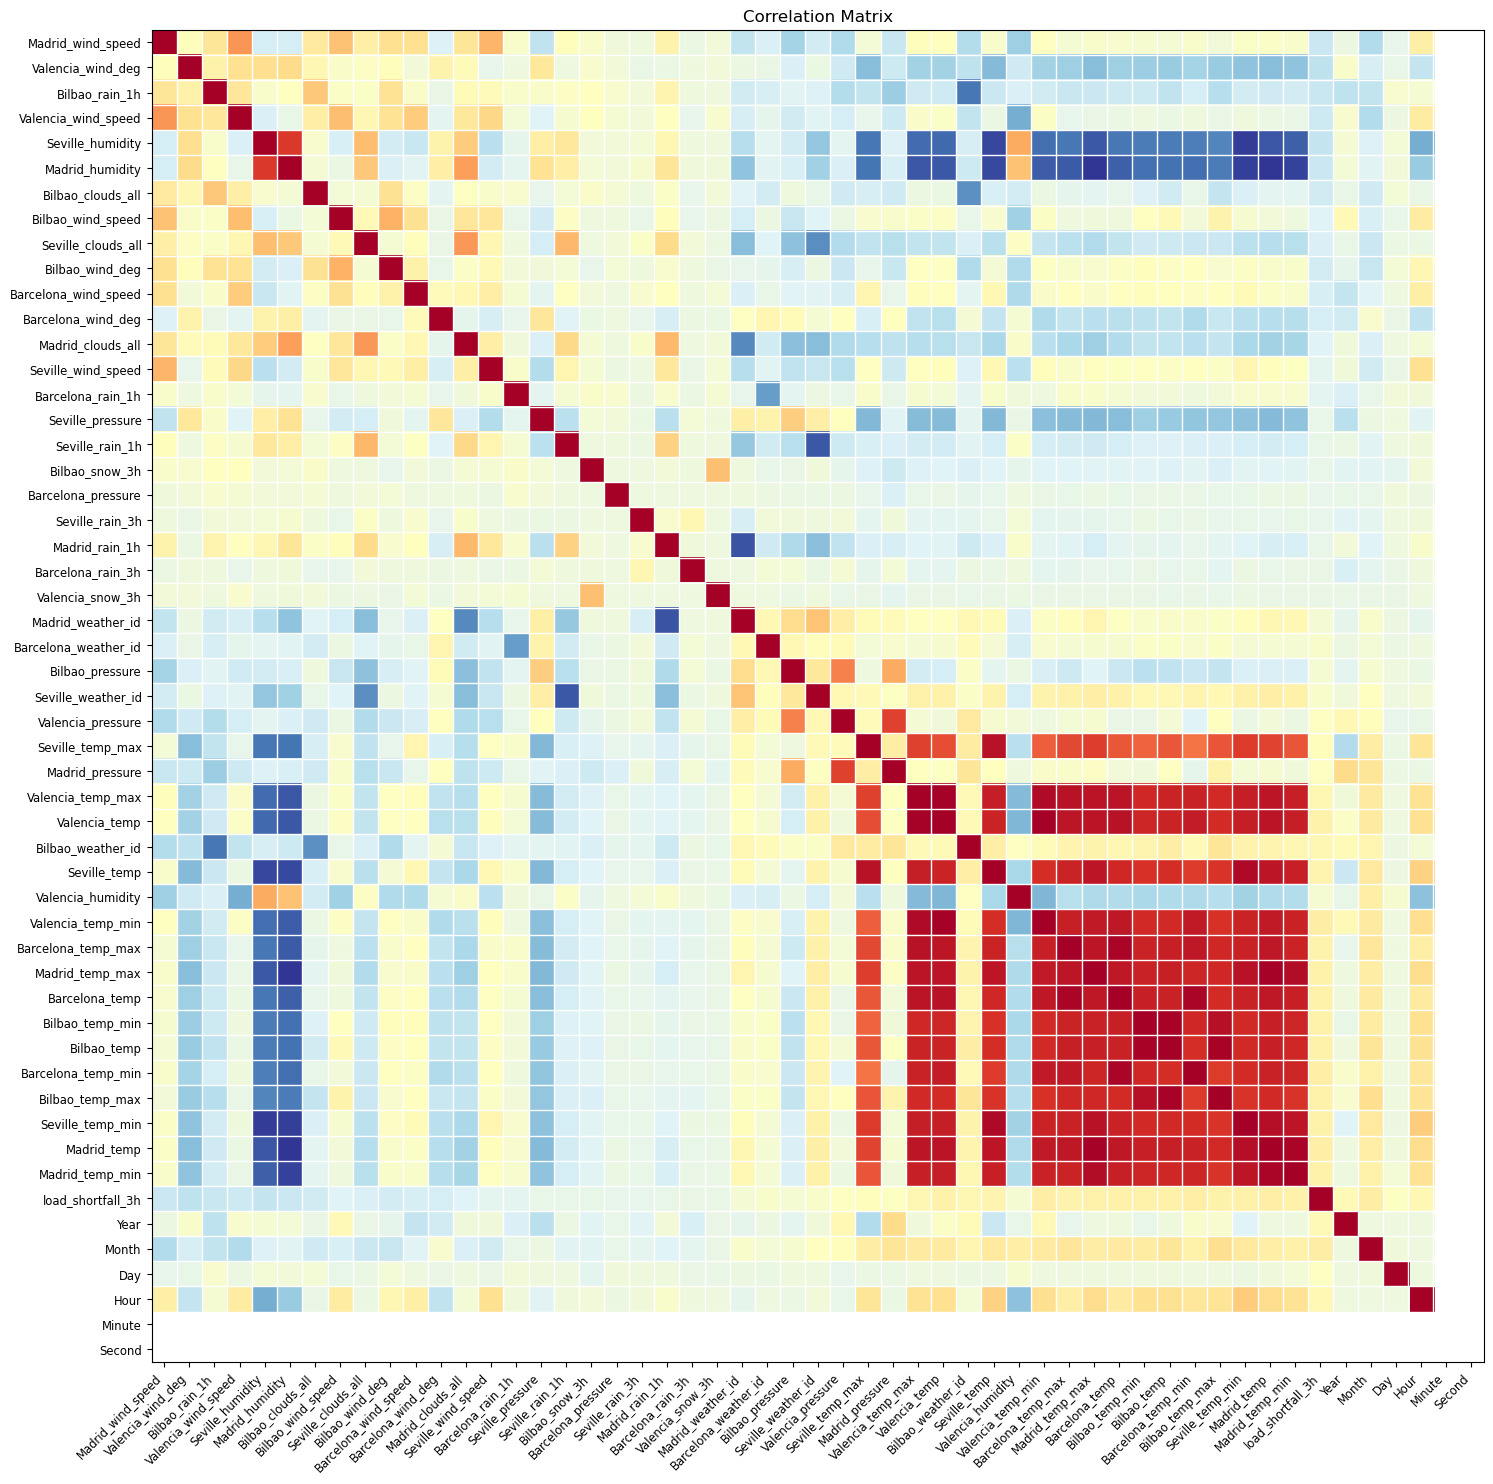

In [39]:
# plot relevant feature interactions
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_clean.corr(), xnames = df_clean.corr().columns, ax = ax);

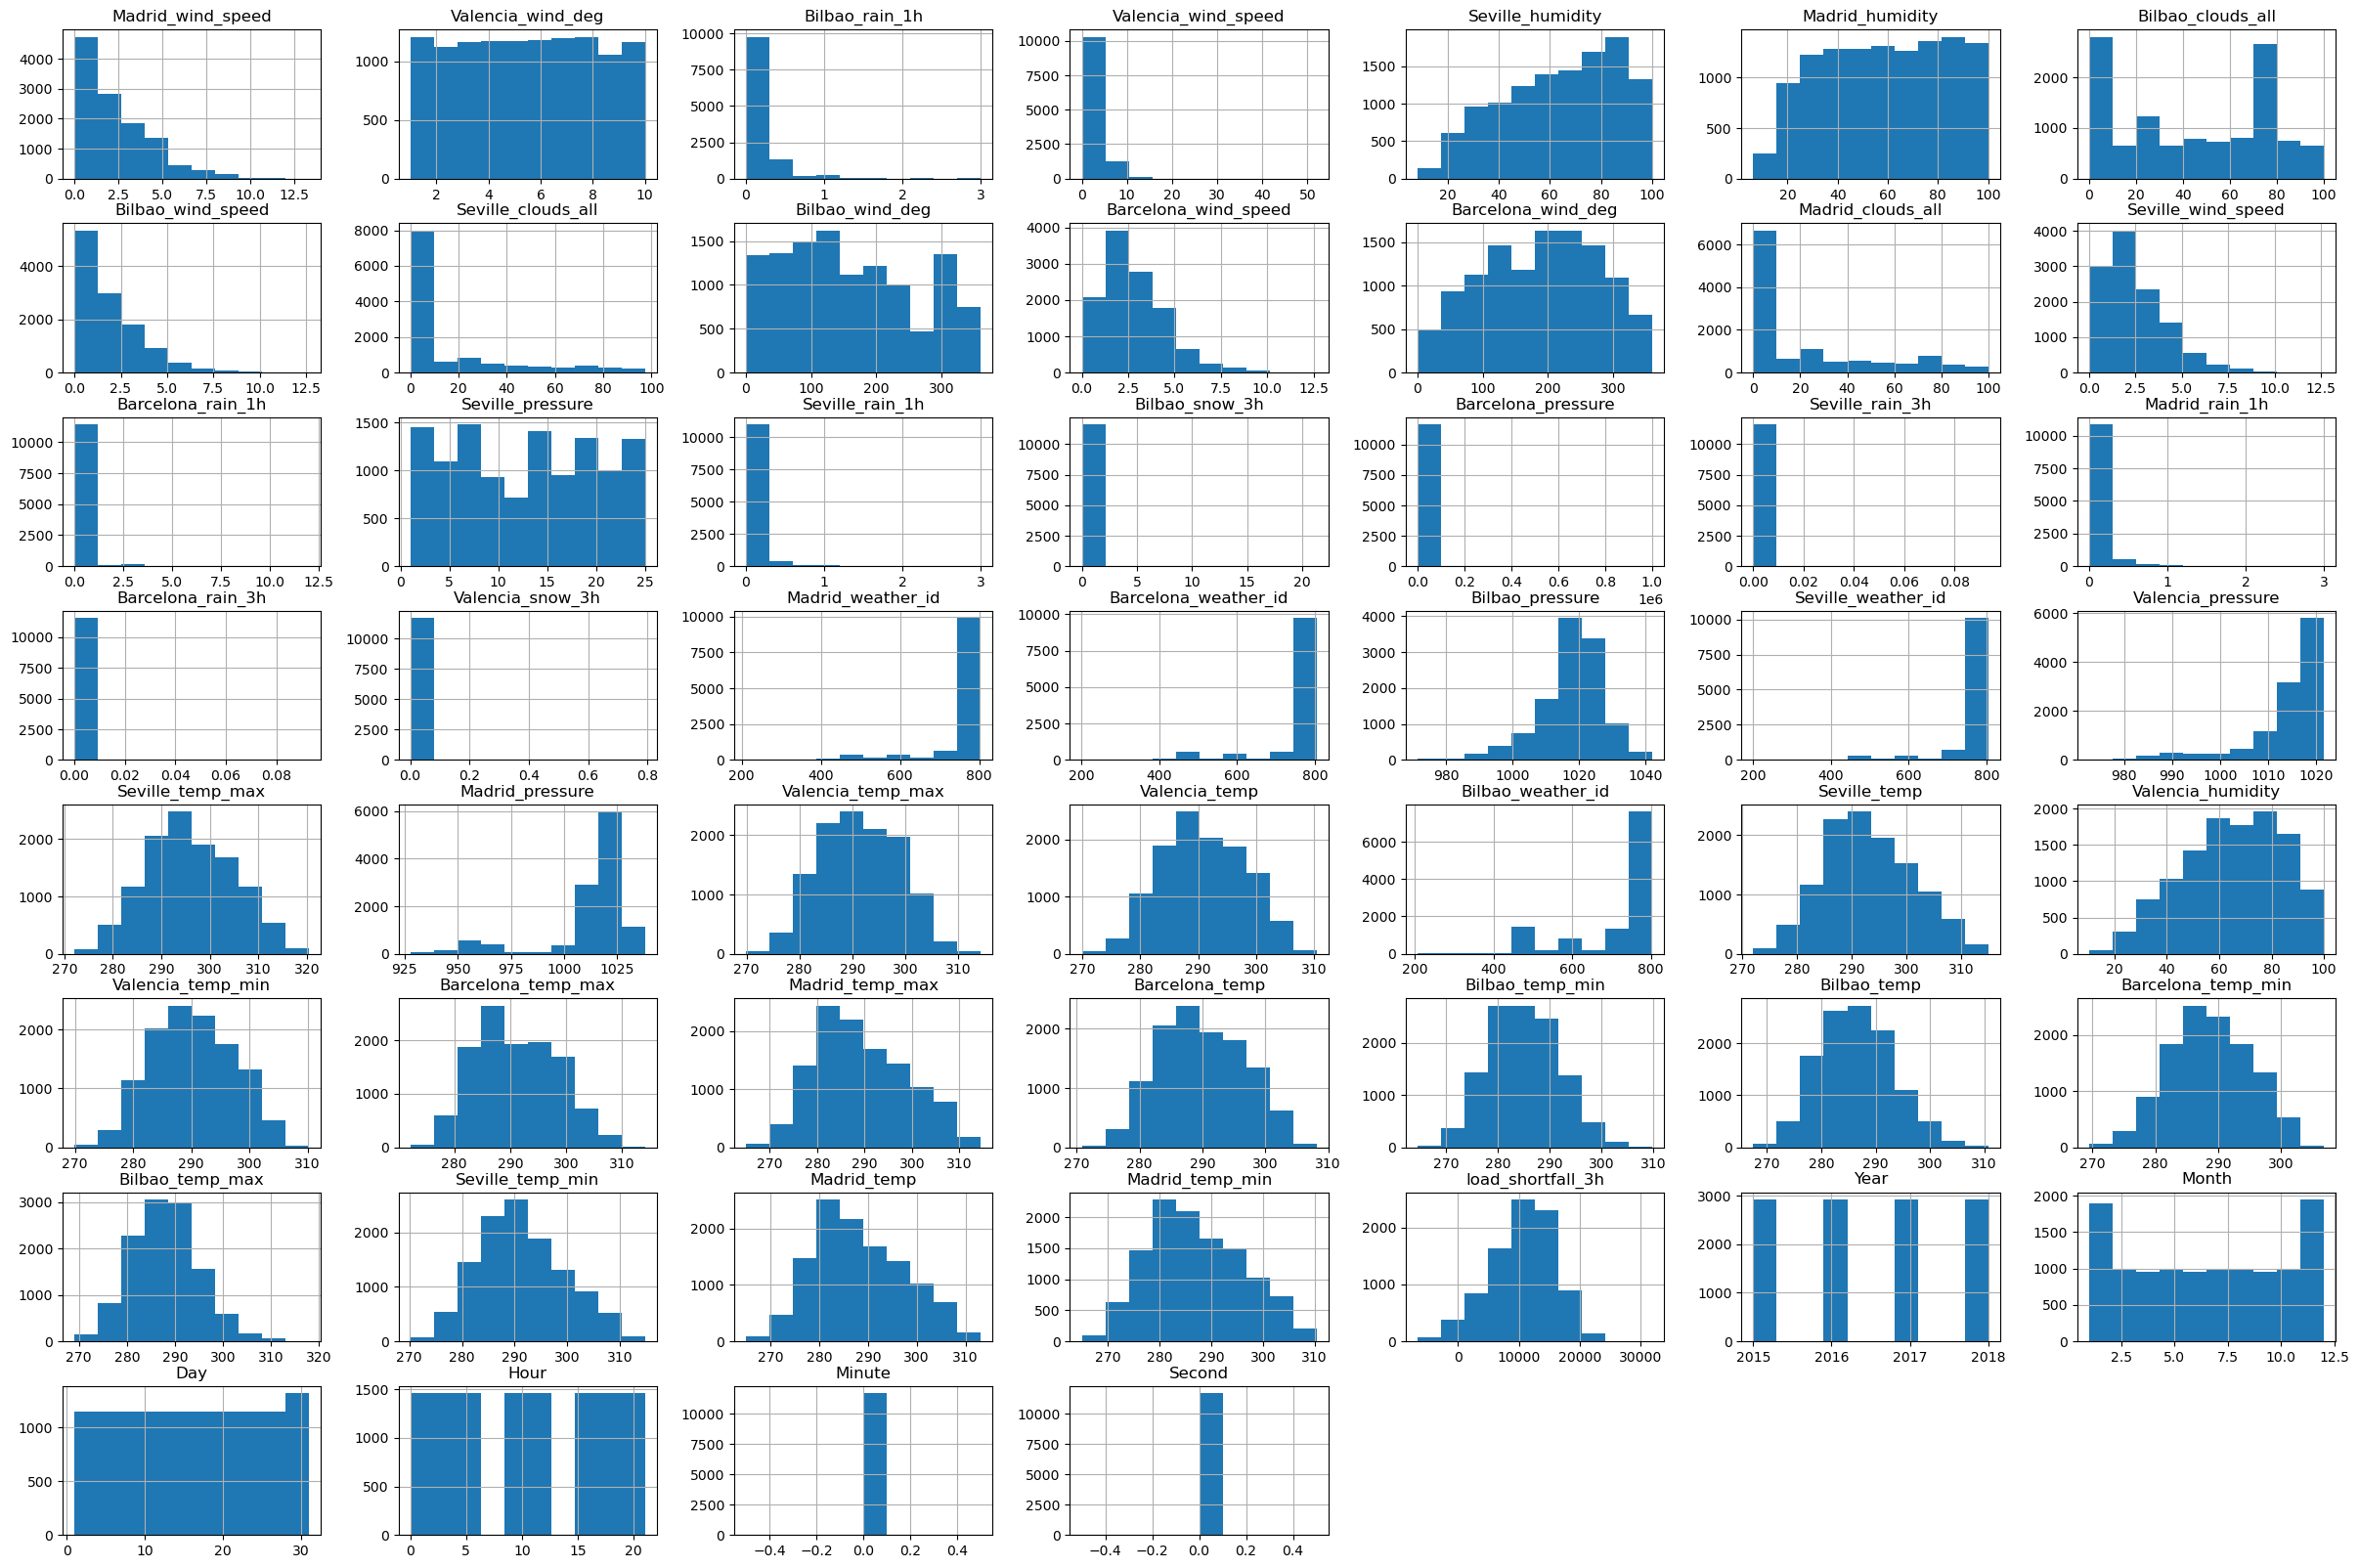

In [40]:
# Create a pairplot with the species column used for coloring
features = df_clean.columns # create a list of all numerical features
df_clean[features].hist(figsize=(30,20));

<Axes: >

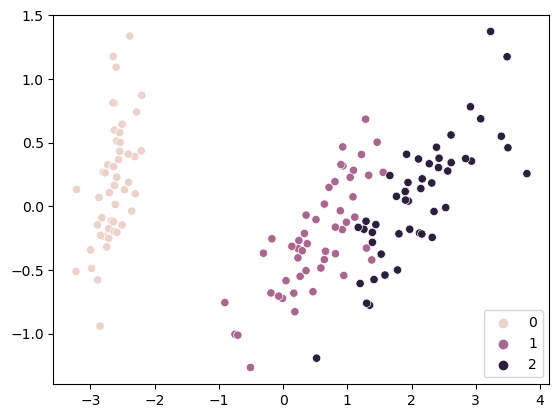

In [99]:
from sklearn import datasets, decomposition

iris = datasets.load_iris() 
X = iris.data
y = iris.target 
pca = decomposition.PCA(n_components=2) 
X = pca.fit_transform(X) 
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y) 

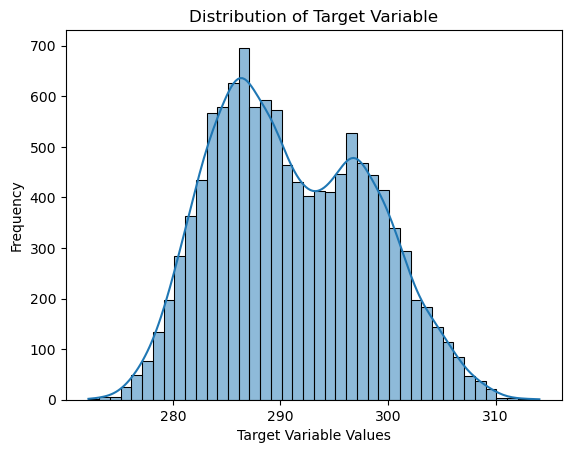

In [86]:
sns.histplot(df_clean['Barcelona_temp_max'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable Values')
plt.ylabel('Frequency')
plt.show()

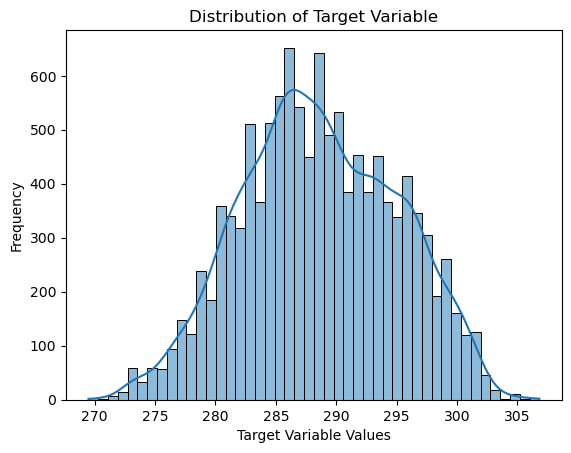

In [87]:
sns.histplot(df_clean['Barcelona_temp_min'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable Values')
plt.ylabel('Frequency')
plt.show()

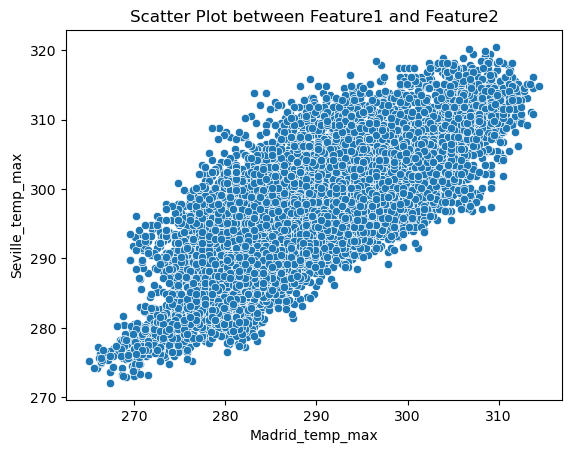

In [77]:
sns.scatterplot(x='Madrid_temp_max', y='Seville_temp_max', data=df_clean)
plt.title('Scatter Plot between Feature1 and Feature2')
plt.show()

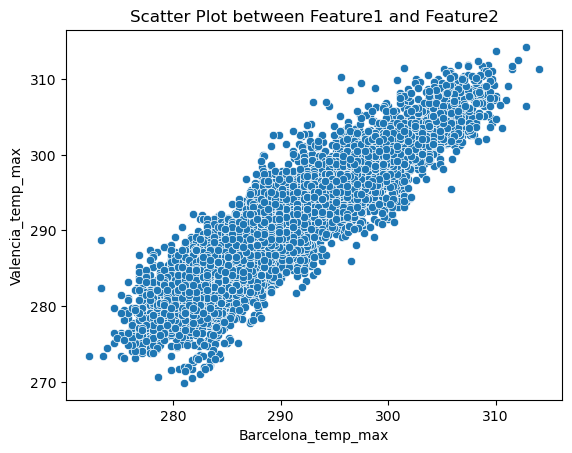

In [78]:
sns.scatterplot(x='Barcelona_temp_max', y='Valencia_temp_max', data=df_clean)
plt.title('Scatter Plot between Feature1 and Feature2')
plt.show()

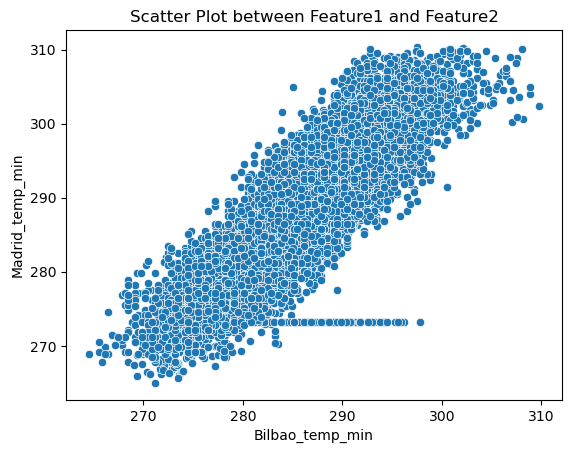

In [81]:
sns.scatterplot(x='Bilbao_temp_min', y='Madrid_temp_min', data=df_clean)
plt.title('Scatter Plot between Feature1 and Feature2')
plt.show()

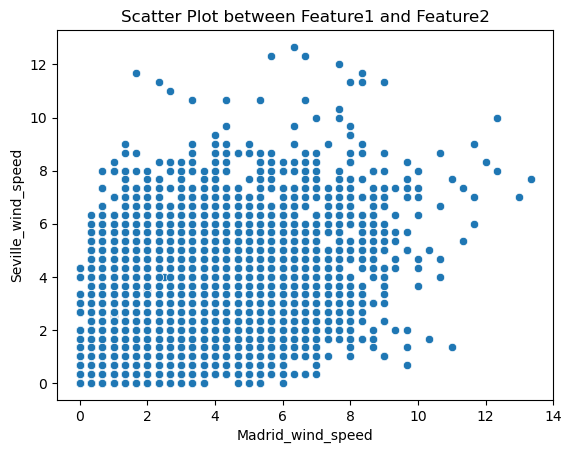

In [82]:
sns.scatterplot(x='Madrid_wind_speed', y='Seville_wind_speed', data=df_clean)
plt.title('Scatter Plot between Feature1 and Feature2')
plt.show()

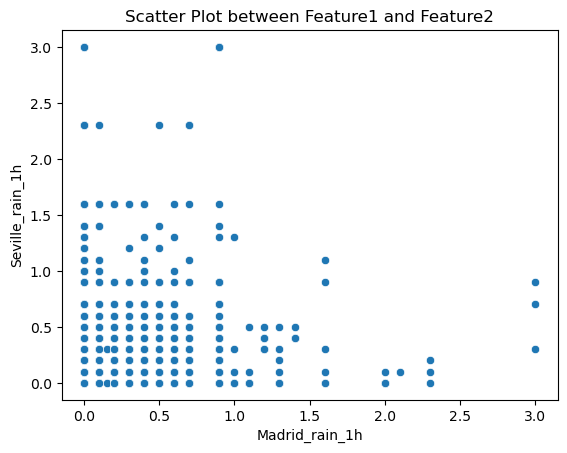

In [83]:
sns.scatterplot(x='Madrid_rain_1h', y='Seville_rain_1h', data=df_clean)
plt.title('Scatter Plot between Feature1 and Feature2')
plt.show()

In [49]:
df_clean.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

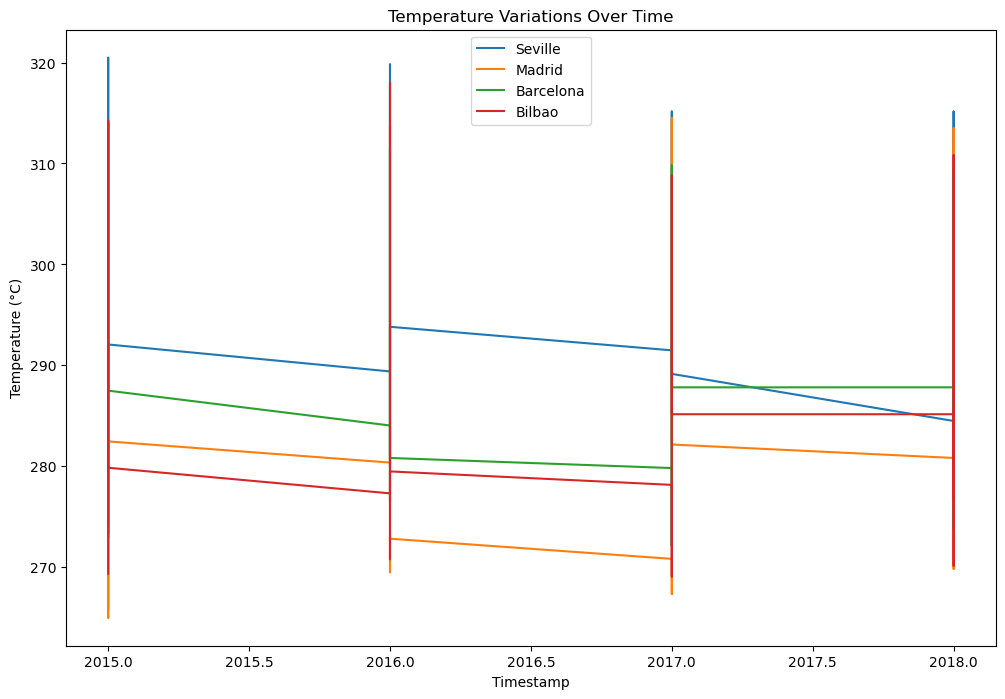

In [68]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
cities = ['Seville', 'Madrid', 'Barcelona', 'Bilbao']

# Plot temperature variations for each city
plt.figure(figsize=(12, 8))

for city in cities:
    max_temp_column = f'{city}_temp_max'
    plt.plot(df_clean['Year'], df_clean[max_temp_column], label=city)

plt.title('Temperature Variations Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

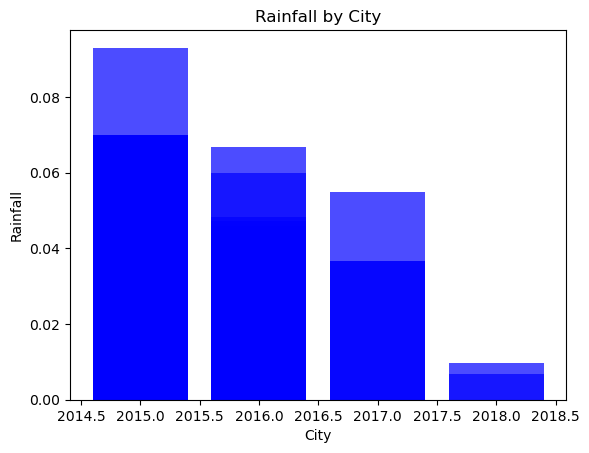

In [73]:
plt.bar(df_clean['Year'], df_clean['Barcelona_rain_3h'], color='blue', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Rainfall')
plt.title('Rainfall by City')
plt.show()

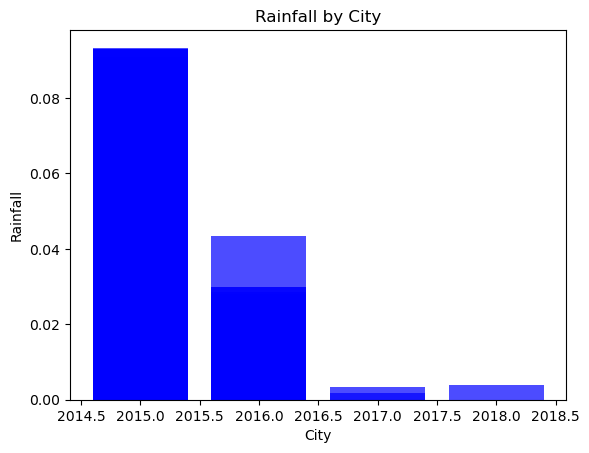

In [89]:
plt.bar(df_clean['Year'], df_clean['Seville_rain_3h'], color='blue', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Rainfall')
plt.title('Rainfall by City')
plt.show()

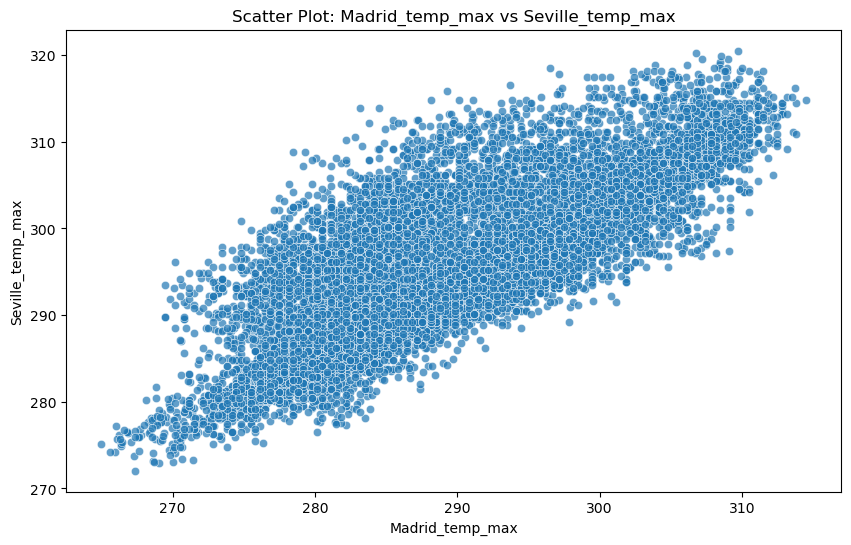

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
x_column = 'Madrid_temp_max'  # Replace with the column you want on the x-axis
y_column = 'Seville_temp_max'  # Replace with the column you want on the y-axis

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_column], y=df[y_column], alpha=0.7)

# Add labels and title
plt.xlabel(f'{x_column}')
plt.ylabel(f'{y_column}')
plt.title(f'Scatter Plot: {x_column} vs {y_column}')

plt.show()

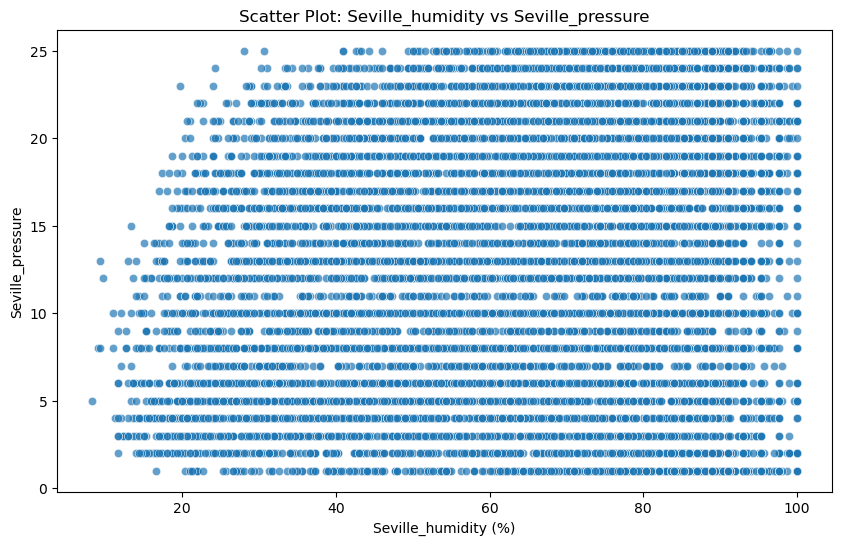

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
humidity_column = 'Seville_humidity'  # Replace with the column you want on the x-axis
pressure_column = 'Seville_pressure'  # Replace with the column you want on the y-axis

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean[humidity_column], y=df_clean[pressure_column], alpha=0.7)

# Add labels and title
plt.xlabel(f'{humidity_column} (%)')
plt.ylabel(f'{pressure_column}')
plt.title(f'Scatter Plot: {humidity_column} vs {pressure_column}')

plt.show()

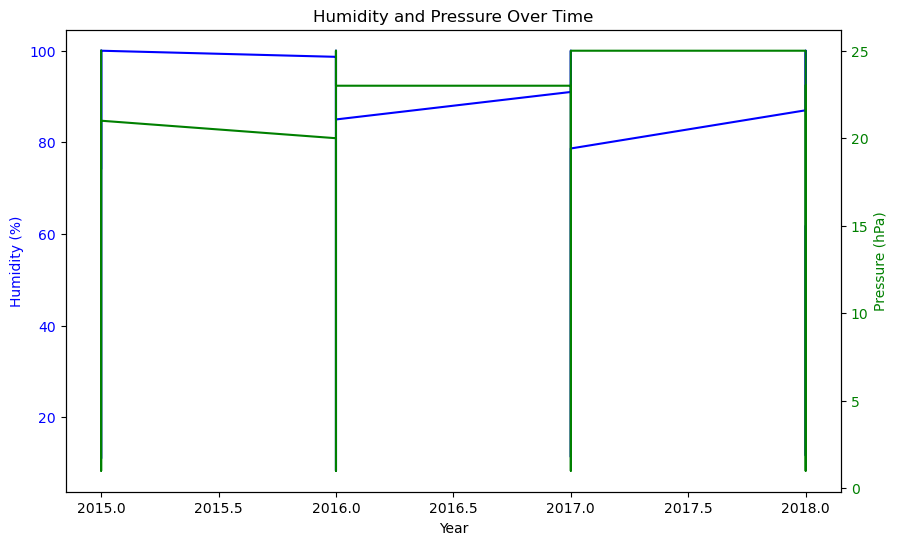

In [93]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
timestamp_column = 'Year'
humidity_column = 'Seville_humidity'
pressure_column = 'Seville_pressure'

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot humidity on the left y-axis
ax1.set_xlabel(timestamp_column)
ax1.set_ylabel('Humidity (%)', color='blue')
ax1.plot(df_clean[timestamp_column], df_clean[humidity_column], color='blue', label='Humidity')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for pressure
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (hPa)', color='green')
ax2.plot(df_clean[timestamp_column], df_clean[pressure_column], color='green', label='Pressure')
ax2.tick_params(axis='y', labelcolor='green')

# Add title
plt.title('Humidity and Pressure Over Time')

# Show the plot
plt.show()

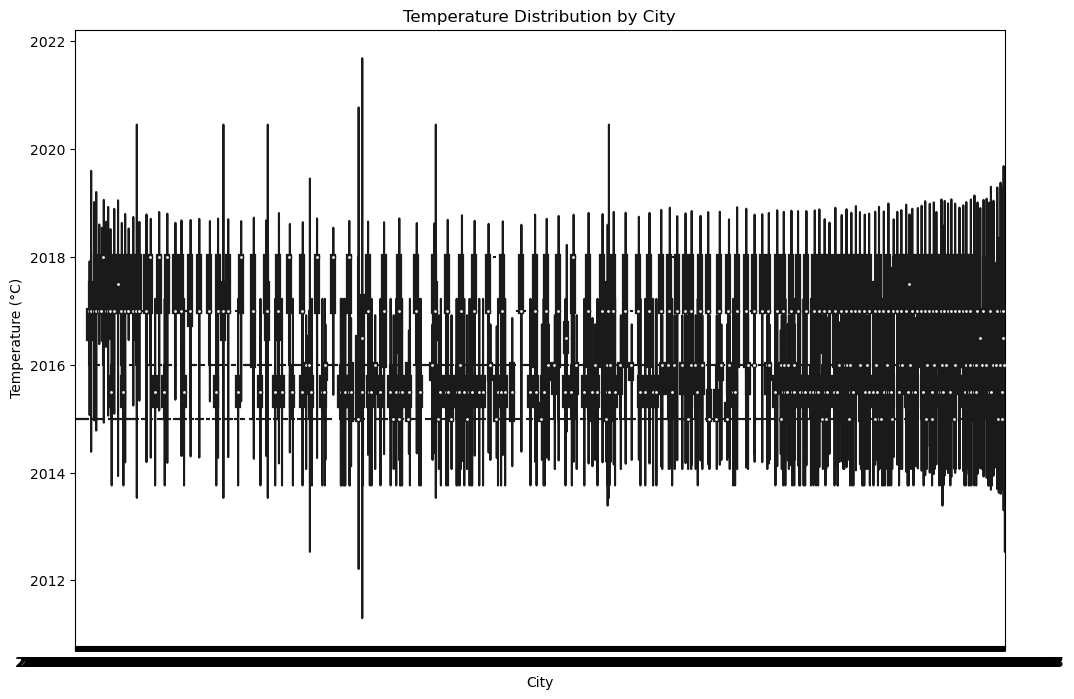

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
cities = ['Seville', 'Madrid', 'Barcelona', 'Valencia', 'Bilbao']

# Create a violin plot
plt.figure(figsize=(12, 8))

sns.violinplot(x=df_clean['C'], y=df_clean['Year'], palette='viridis')

plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution by City')

plt.show()

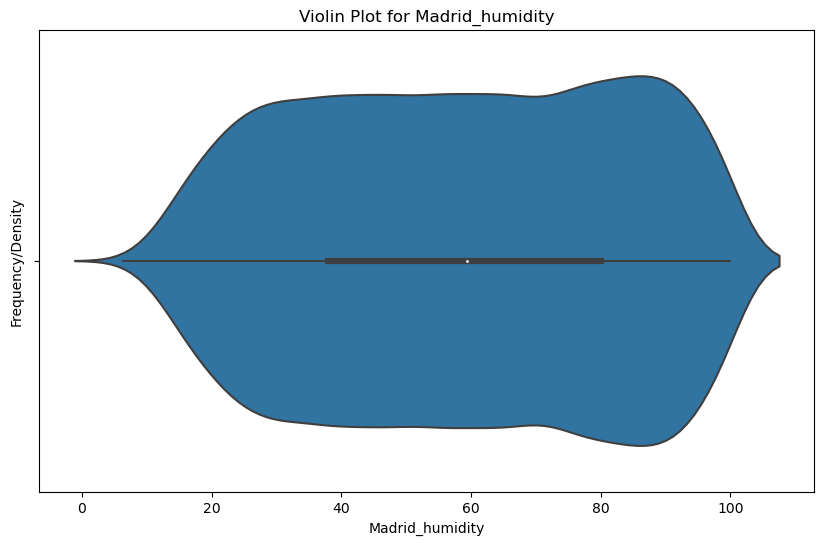

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
column_of_interest = 'Madrid_humidity'  # Replace with the column you want to visualize

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_clean[column_of_interest])

# Add labels and title
plt.xlabel(f'{column_of_interest}')
plt.ylabel('Frequency/Density')
plt.title(f'Violin Plot for {column_of_interest}')

plt.show()

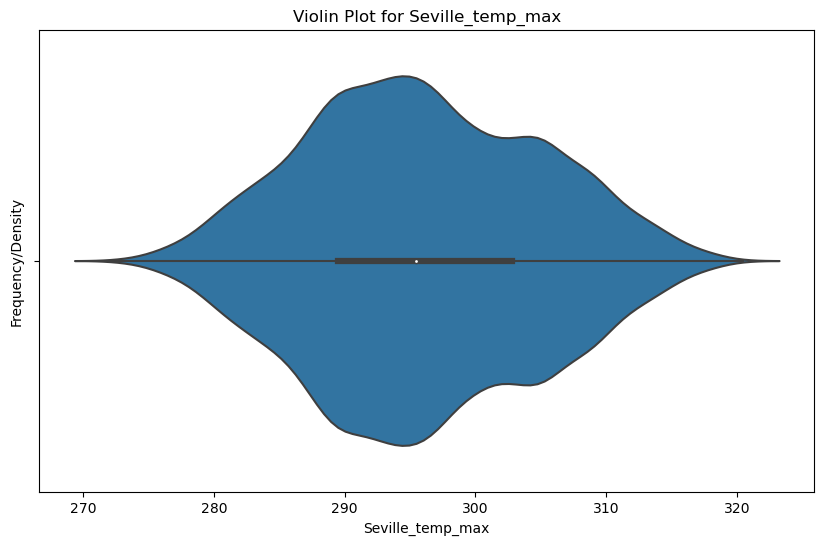

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
column_of_interest = 'Seville_temp_max'  # Replace with the column you want to visualize

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_clean[column_of_interest])

# Add labels and title
plt.xlabel(f'{column_of_interest}')
plt.ylabel('Frequency/Density')
plt.title(f'Violin Plot for {column_of_interest}')

plt.show()

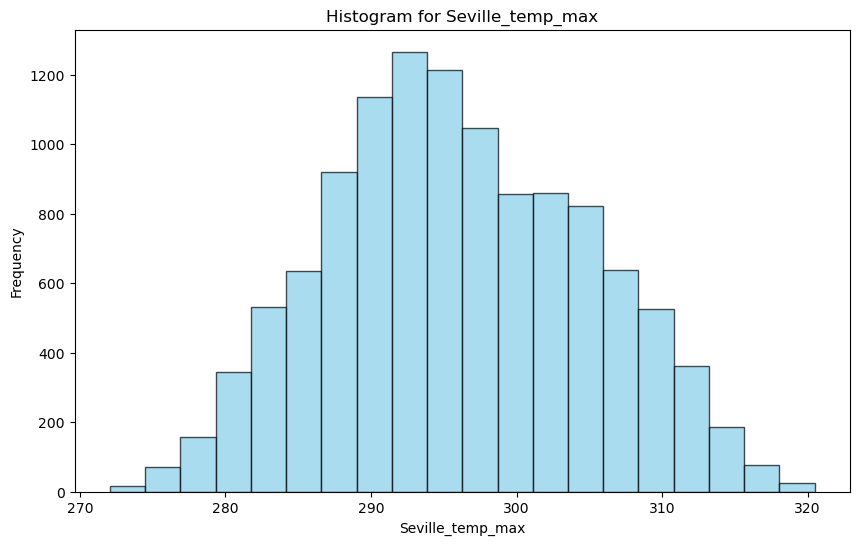

In [101]:
# Assuming df is your DataFrame with the mentioned columns
column_of_interest = 'Seville_temp_max'  # Replace with the column you want to visualize

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean[column_of_interest], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel(f'{column_of_interest}')
plt.ylabel('Frequency')
plt.title(f'Histogram for {column_of_interest}')

plt.show()


In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features


In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic